## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#For visualising the screeplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Linear Combination

A linear combination of a set of vectors is an expression obtained by multiplying those set of vectors with a scalar/real number and then adding them up. For example,

If you have a set of vectors, say (2,3) and (3,4) a linear combination of these 2 vectors would be m(2,3) + n(3,4), where m and n are some real numbers. Since m and n can take any values, the number of linear combinations are infinite. The linear combination vector would therefore be shown as (2m + 3n , 3m+ 4n)

In [4]:
v1 = np.array([2,3])
v2 = np.array([3,4])
m = 1
n = 2

lincom = m*v1 +  n*v2
lincom

array([ 8, 11])

We can do the reverse part as well. That is finding the values of m,n for which the given vector is a linear combination of the previous two vectors.​

In [5]:
lincom2  = ([8,11])
setvec = np.array([[2,3],[3,4]])
m,n = np.linalg.solve(setvec, lincom2)
m,n

(0.9999999999999994, 2.0000000000000004)

Thus you've understood how linear combinations work.  Now the next interesting thing to ponder up would be to answer one important question - can every vector in 2-D space be represented as a linear combination of (2,3) and (3,4)? 

#### Or more generally can any vector in 2-D space be represented as a linear combination of any set of vectors?

### Basis Vectors

So if you actually have a set of vectors where no matter what other vector you pick, it can always be represented as a linear combination of that set, then it is known as the basis vectors for that data-space or dimension. For example the vectors (2,3) and (3,4) can represent any other vector in 2-D as a linear combination of themeselves and hence they're a set of basis vectors for the 2-D space.

In [6]:
lincom2  = ([6,3])
setvec = np.array([[2,3],[3,4]])
m,n = np.linalg.solve(setvec, lincom2)
round(m),round(n) 

(-15.0, 12.0)

What is the issue below? Why I am not able to represent (6,3) in given set vectors?

In [7]:
lincom2  = ([6,3])
setvec = np.array([[2,0],[3,0]])
m,n = np.linalg.solve(setvec, lincom2)
round(m),round(n) 

LinAlgError: Singular matrix

The reason why these vectors - (2,0) and (3,0) would throw up an error is because they are collinear, i.e. one of the vectors can be represented as a scalar multiple of the other vector. 
#### (3,0) = 1.5(2,0).

Collinear vectors always have the same direction and can always be represented as a scalar multiple of one another. So, a linear combination of these collinear vectors would also have the same direction,i.e. again be collinear

m(3,0) + n(2,0) = (3m+2n,0)

Therefore, not all vectors can be represented as a linear combination of these collinear vectors since they might have a different direction from the previous ones.

## Properties of standard coordinate system

1. It is orthogonal, i.e. the vectors (1,0) and (0,1) are perpendicular to each other.
2. It is normalized, i,e. the magnitude of each vectors is 1.

Or you can say that it is orthonormal.
Let's verify this and check some other orthonormal basis vectors

In [8]:
# The vectors are orthogonal.
setvec = np.array([[1,0],[0,1]])
np.dot(setvec[0],setvec[1])

0

In [9]:
##This would mean that each of them would be of unit magnitude
print(np.linalg.norm(setvec[0]))
print(np.linalg.norm(setvec[1]))

1.0
1.0


## Linear Transformation
A linear transformation is essentially a matrix transformation on a vector where the vector's geometric properties gets changed  due to elongation, rotation, shifting of axes or some other form of distortion.
If L is matrix that denotes the transformation and v is the vector on which the transformation is happening, then the resultant vector is given by Lv. 


####  Elongation 

First we'll see how multiplying a vector/matrix with another vector elongates it.Let's consider a linear transformation where the original basis vectors i(1,0) and j(0,1) move to the points i'(2,0) and j'(0,1)

In [10]:
# Data Frame where each row present a datapoint
a = [[1,2],[-2,3],[-2,1],[3,7],[4,5],[6,4]]
b = ['X','Y']
c = pd.DataFrame(a,columns = b)
c

,X,Y
0,1,2
1,-2,3
2,-2,1
3,3,7
4,4,5
5,6,4


In [11]:
# Linear transformation matrix
L = np.array([[2,0],[0,1]])
L

array([[2, 0],
       [0, 1]])

In [12]:
#Let's apply the transformation now.
d  = L @ (c.values).T

In [13]:
d.T

array([[ 2,  2],
       [-4,  3],
       [-4,  1],
       [ 6,  7],
       [ 8,  5],
       [12,  4]])

#### Shifting of axes

Let's say from the original basis vectors i(1,0) and j(0,1) we want to shift it to the new orthonormal basis vectors i'(0.8,0.6) and j'(-0.6,0.8). What would be the location of the points in the newer basis?

In [14]:
c

,X,Y
0,1,2
1,-2,3
2,-2,1
3,3,7
4,4,5
5,6,4


In [15]:
L = np.array([[0.8,-0.6],[0.6,0.8]])

#Finding the inverse and then using the transformation on the given set of points.
Ld = np.linalg.inv(L)

a = [[1,2],[-2,3],[-2,1],[3,7],[4,5],[6,4]]
b = ['X','Y']
c = pd.DataFrame(a,columns = b)

d  = Ld @ (c.values).T
d.T

array([[ 2. ,  1. ],
       [ 0.2,  3.6],
       [-1. ,  2. ],
       [ 6.6,  3.8],
       [ 6.2,  1.6],
       [ 7.2, -0.4]])

## Basis Transformation

In [16]:
a=[[1,2],[2,4],[3,6],[4,8],[5,10],[6,12],[7,14]]
b=['X','Y']
c = pd.DataFrame(a,columns = b)
c

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14


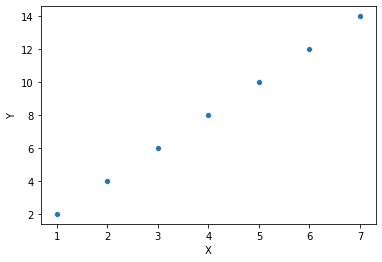

In [17]:
#Let's visualise to notice if any pattern exists
sns.scatterplot(x ='X', y='Y',data=c)

In [18]:
# Let's represent the datapoint int he polar coordinate p
p = np.array([[0.4472136,-0.89442719],[ 0.89442719,0.4472136]])
p

array([[ 0.4472136 , -0.89442719],
       [ 0.89442719,  0.4472136 ]])

In [19]:
pI= np.linalg.inv(p)

# Performing the basis transformation.
C= pI @ c.T
C.T

,0,1
0,2.236068,1.000000e-08
1,4.472136,2.000000e-08
2,6.708204,3.000000e-08
3,8.944272,4.000000e-08
4,11.180340,5.000000e-08
5,13.416408,6.000000e-08
6,15.652476,7.000000e-08


In [20]:
D = C.T
D.columns = ['X', 'Y']
D['Y']=abs(round(D['Y']))
D

,X,Y
0,2.236068,0.0
1,4.472136,0.0
2,6.708204,0.0
3,8.944272,0.0
4,11.180340,0.0
5,13.416408,0.0
6,15.652476,0.0


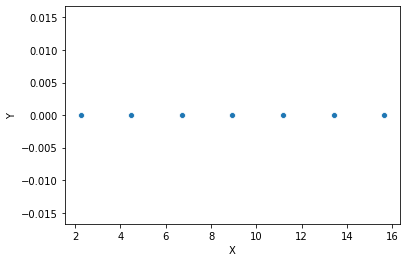

In [21]:
#Let's plot the scatterplot again.
sns.scatterplot(x='X',y='Y',data =D)

Now you can see that all the data points are aligned along the new X axis and have no values on the new Y axis. This is essentially what you achieve by doing basis transformation.

### Eigenvectors and Eigendecomposition

A special kind of linear transformation that can happen to a vector is that when a matrix is multiplied to it, it only manages to stretch the vector by a certain scalar magnitude. These vectors are known as eigenvectors for that particular matrix and that scalar magnitude is known as the corresponding eigenvalue. Formally, they can be written as follows,

Av = λv , where A is the original matrix / linear transformation, v is the eigenvector and λ is the corresponding eigenvalue.

Let's go through a few demonstrations to understand how they can be derived. Observe that here we are going the reverse route. Instead of finding the effect the linear transformation matrix has on the vector, in this case, we have the matrix and the effect it generates. We need to find all the vectors where this effect is visible.

In [22]:
A = np.array([[2,1],[1,2]])

K = np.linalg.eig(A)

#Eigenvalues
print('Eigenvalues', K[0])

#Eigenvectors
print('Eigenvectors', K[1])

# Verify the results
# Let's verify them once again. First, let's calculate Av
print('Av',A @ (K[1].T)[0])

#Now let's calculate λv.
print('λv',3*(K[1].T)[0])

# Output:
# As you can see Av = λv has been verified.

Eigenvalues [3. 1.]
Eigenvectors [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Av [2.12132034 2.12132034]
λv [2.12132034 2.12132034]


## Intresenting Calculation

In [23]:
# Arrange the eigenvalues along the diagonal of a square matrix.
S = np.array([[3,0], [0,1]])

# Take eigenvector
Q=K[1]

# take the inverse of eigenvector
P = np.linalg.inv(Q)

# The product of the three matrices obtained in the following order.
Q @ S @ P

array([[2., 1.],
       [1., 2.]])

## We've obtained the original matrix that we started with!

This trick that we just did is called the eigendecomposition of a matrix, which states that as long as A is a square diagonalizable matrix, it can always be decomposed into 3 matrices Q, S and P, where

1. Q is the eigenvector matrix
2. S is a diagonal matrix with the eigenvalues as the diagonal elements
3. P is the inverse of the matrix Q.

## PCA Properties

In [24]:
#Let's now take the following dataframe
a = [[0,0,0],[1,2,3],[2,4,5],[3,6,2],[4,8,3],[5,10,1]]
b = ['X','Y','Z']
dat = pd.DataFrame(a,columns = b)
dat

,X,Y,Z
0,0,0,0
1,1,2,3
2,2,4,5
3,3,6,2
4,4,8,3
5,5,10,1


### PCA Properties
- They're weighted linear combinations of the original variables.
- They're perpendicular to each other.
- They capture maximum variance of the data and are ordered.

In [25]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
pca.fit(dat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
pca.components_

array([[-4.46999485e-01, -8.93998971e-01, -3.09402653e-02],
       [-1.38369073e-02, -2.76738146e-02,  9.99521235e-01],
       [ 8.94427191e-01, -4.47213595e-01,  9.16794248e-19]])

### They're weighted linear combinations of the original variables.

In [28]:
# This value can be represented as a linear combination of the original variables. 
# The original variables or the original axes are represented by X(1,0,0) , Y(0,1,0) and Z(0,0,1).
# [-0.45,-0.89,-0.03] = -0.45[1,0,0] + (-0.89)[0,1,0] + (-0.03)[0,0,1]
#     = -0.45X + (-0.89)Y +(-0.03)Z,  which is a linear combination of the original variables
lincom  = pca.components_[0]
setvec = np.array([[1,0,0],[0,1,0],[0,0,1]])
x,y,z = np.linalg.solve(setvec, lincom)
round(x,2),round(y,2),round(z,2)

(-0.45, -0.89, -0.03)

### They're perpendicular to each other.

In [29]:
round(np.dot(pca.components_[0],pca.components_[1]))

0.0

### They capture maximum variance of the data and are ordered.

In [30]:
pca.explained_variance_ratio_.round(2)

array([0.85, 0.15, 0.  ])

In [31]:
pca.fit_transform(dat)

array([[ 5.65968752e+00, -2.15925487e+00,  9.12398706e-33],
       [ 3.33186930e+00,  7.70124295e-01, -3.68296505e-33],
       [ 1.03499134e+00,  2.69998223e+00,  9.85852713e-33],
       [-1.10718529e+00, -3.67766013e-01,  4.12990543e-34],
       [-3.37312298e+00,  5.62570686e-01,  6.36178963e-33],
       [-5.54623988e+00, -1.50565632e+00,  4.98624157e-33]])

In [32]:
## Projecting datapoints on Principal Components

In [33]:
#We can directly use the pca function pca.fit_transform
#This is equivalent to the basis transformation that we did in last session.

dat_new2 = pca.fit_transform(dat)
cols = ['X','Y','Z']
dat_new3 = pd.DataFrame(dat_new2, columns = cols).round(2)
dat_new3

,X,Y,Z
0,5.66,-2.16,0.0
1,3.33,0.77,-0.0
2,1.03,2.70,0.0
3,-1.11,-0.37,0.0
4,-3.37,0.56,0.0
5,-5.55,-1.51,0.0


In [34]:
100*np.var(dat_new3)/sum(np.var(dat_new3))

X    85.145166
Y    14.854834
Z     0.000000
dtype: float64

### Let's do a final check. Lets see the varince of original data and transformed data

In [35]:
sum(np.var(dat)), sum(np.var(dat_new3))

(17.138888888888886, 17.14266111111111)

#### This is what PCA does. It doesn't change the total variance of the dataset. It only rearranges them in the direction of maximum variances

## PCA using Eigendecomposition

In [36]:
#Let's take this dataset
a = [[0,0],[1,2],[2,3],[3,6],[4,8],[5,9]]
b = ['X','Y']
dat = pd.DataFrame(a,columns = b)
dat

,X,Y
0,0,0
1,1,2
2,2,3
3,3,6
4,4,8
5,5,9


In [37]:
# A reason as to why we're doing this is to capture the variance of the entire dataset
C = np.cov(dat.T)
C

array([[ 3.5       ,  6.6       ],
       [ 6.6       , 12.66666667]])

In [38]:
eigenvalues, eigenvectors = np.linalg.eig(C)

In [39]:
# Sorting eigenvectors based on eigen value
idx = eigenvalues.argsort()[::-1]   
eigenvalues= eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

### Let's look at the data points in PC components

In [40]:
Cnew = np.linalg.inv(eigenvectors) @ dat.T
cols  = ['X','Y']
Cnewt = Cnew.T
Cnewt.columns = cols
Cnewt

,X,Y
0,0.000000,0.000000
1,-2.235695,0.040821
2,-3.585277,-0.381825
3,-6.707086,0.122463
4,-8.942781,0.163284
5,-10.292363,-0.259362


In [41]:
100*np.var(Cnewt)/sum(np.var(Cnewt))

X    99.703232
Y     0.296768
dtype: float64

In [42]:
eigenvectors

array([[-0.46346747, -0.88611393],
       [-0.88611393,  0.46346747]])

## Let's compare it to the PCA

In [59]:
pca = PCA(svd_solver='randomized', random_state=42)

In [60]:
pca.fit(dat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [45]:
pca.components_

array([[-0.46346747, -0.88611393],
       [ 0.88611393, -0.46346747]])

In [46]:
pca.explained_variance_ratio_

array([0.99703232, 0.00296768])

## Why?

Spectral Theorem. Because of this theorem eigendecomposition of the covariance matrix will always:
1. Yield the eigenvectors which are perpendicular to each other 
2. Have maximum variances allocated to them in an ordered way depending on the magnitude of the eigenvalues.
3. These eigenvectors would also be the linear combinations of the original variables as well.

## Using SVD Function

In [47]:
#Let'se use the SVD function from np.linalg library
U, s, VT = np.linalg.svd(dat, full_matrices=False)

In [48]:
U

array([[ 1.47280506e-17,  2.49365625e-16],
       [-1.41730722e-01, -1.12691117e-01],
       [-2.27476796e-01,  7.22512837e-01],
       [-4.25192165e-01, -3.38073350e-01],
       [-5.66922887e-01, -4.50764467e-01],
       [-6.52668961e-01,  3.84439487e-01]])

In [49]:
s

array([15.77196179,  0.49519836])

In [50]:
VT

array([[-0.46939609, -0.88298772],
       [ 0.88298772, -0.46939609]])

In [51]:
eigenvectors

array([[-0.46346747, -0.88611393],
       [-0.88611393,  0.46346747]])

In [52]:
# Project the data now by doing the basis transformation
datn = np.linalg.inv(eigenvectors) @ dat.T
datn.T

,0,1
0,0.000000,0.000000
1,-2.235695,0.040821
2,-3.585277,-0.381825
3,-6.707086,0.122463
4,-8.942781,0.163284
5,-10.292363,-0.259362


In [53]:
# convert s matrix to a diagonal one
o = U @ np.array([[15.77196179,0],[0,0.49519836]])
o

array([[ 2.32290252e-16,  1.23485448e-16],
       [-2.23537153e+00, -5.58044561e-02],
       [-3.58775534e+00,  3.57787172e-01],
       [-6.70611458e+00, -1.67413368e-01],
       [-8.94148611e+00, -2.23217825e-01],
       [-1.02938699e+01,  1.90373803e-01]])

#### U.s = Representing the datapoints in the Principal components

- SVD overcomes the main problem of eigendecomposition where the matrix needs to be square and diagonalizable.

- SVD enables us to decompose the data to find hidden themes in a more succint way

## Screeplots

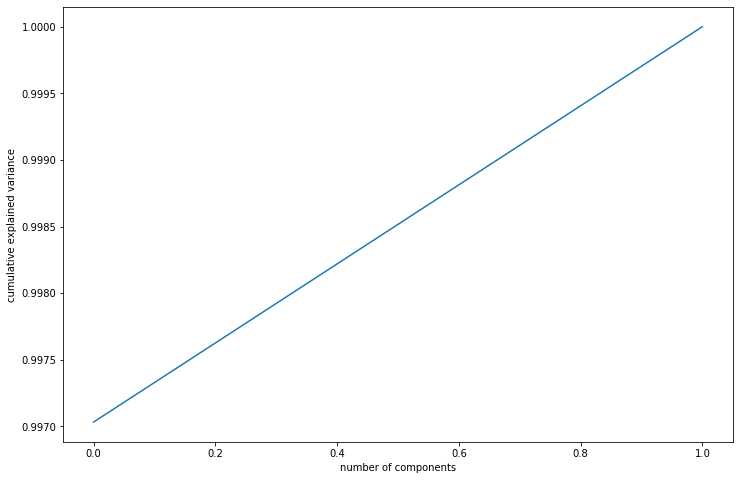

In [61]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
ratings = pd.read_csv("Book-Ratings.csv")

In [56]:
pca = PCA(svd_solver='randomized', random_state=42)

In [57]:
pca.fit(ratings)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

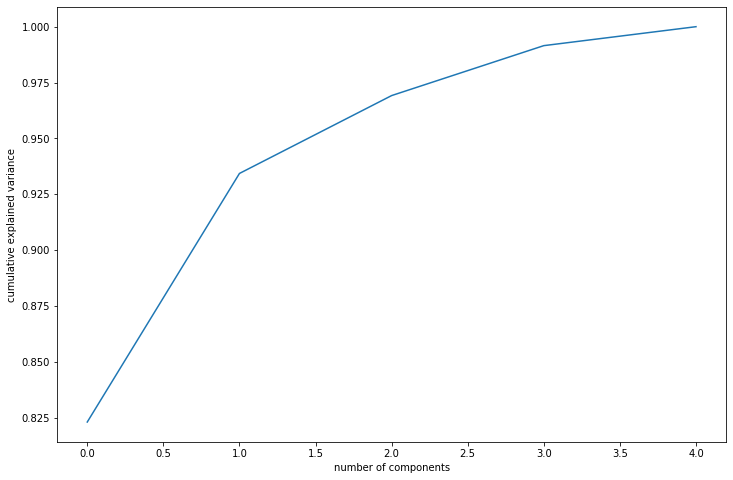

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
# 3 principal components are sufficient in explaining 98 % of the variance.

### The basic steps of PCA are as follows
1. Find the basis vectors along which the variances are maximum
2. The basis vectors are orderered on the basis of variances.
3. This means the first basis vector would have the highest possible variance, the second basis vector would have the second highest variance and so on.
4. These basis vectors should also be orthonormal.
5. These are called the Prinicpal Components of the original dataset